In [1]:
from minisom import MiniSom
import numpy as np
import pandas as pd

In [7]:
data = pd.read_csv('새만금_하천_오염도.csv')
data = data.iloc[:, 3:]

In [10]:
data.iloc[6, 3] = 1000
data.iloc[7, 3] = 1000
data.iloc[6, 4] = 200
data.iloc[7, 4] = 200

In [11]:
data

,BOD(㎎/L),SS(㎎/L),TP(㎎/L),총대장균군수(총대장균군수/100ml),분원성대장균군수,오염도
0,3.8,28.5,0.117,8000.0,50.0,3.75
1,1.7,28.4,0.092,28000.0,2800.0,3.33
2,16.0,13.2,0.091,20000.0,36.0,3.25
3,5.9,18.8,0.153,1500.0,100.0,3.20
4,3.4,22.8,0.122,5800.0,2200.0,3.00
5,5.5,11.5,0.048,2900.0,58.0,3.00
6,3.7,20.0,0.108,1000.0,200.0,3.00
7,4.3,21.1,0.134,1000.0,200.0,3.00
8,4.7,16.8,0.139,6900.0,100.0,2.75
9,2.9,15.4,0.073,10000.0,610.0,2.75


In [12]:
data =(data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

In [16]:
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5,
             learning_rate=.5, neighborhood_function='gaussian',
             random_seed=10)

som.train(data, 1000, verbose=True)

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.4204671003623712


In [17]:
winner_coordinates = np.array([som.winner(x) for x in data]).T
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)

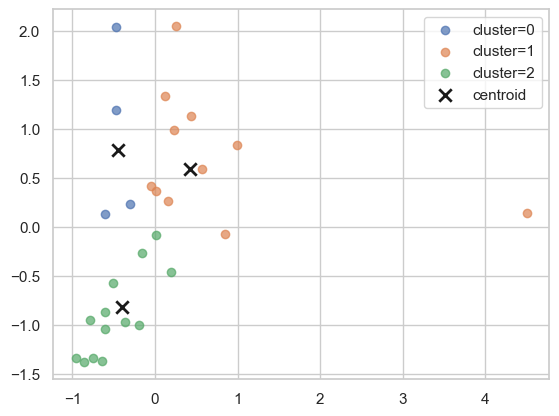

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
               data[cluster_index == c, 1],
               label = 'cluster='+str(c), alpha=.7)
    
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x',
               s=80, linewidths=2, color='k', label='centroid')
    
plt.legend();